In [1]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import nltk


In [2]:
url = "https://www.gutenberg.org/files/43/43-h/43-h.htm"

In [3]:
req = requests.get(url)

In [5]:
html = req.text

In [6]:
soup = BeautifulSoup(html, "html5lib")

In [8]:
soup.title.string

'The Project Gutenberg eBook of The Strange Case Of Dr. Jekyll And Mr. Hyde, by Robert Louis Stevenson'

In [16]:
soup.findAll("a")

[<a href="https://www.gutenberg.org">www.gutenberg.org</a>,
 <a href="#chap01">STORY OF THE DOOR</a>,
 <a href="#chap02">SEARCH FOR MR. HYDE</a>,
 <a href="#chap03">DR. JEKYLL WAS QUITE AT EASE</a>,
 <a href="#chap04">THE CAREW MURDER CASE</a>,
 <a href="#chap05">INCIDENT OF THE LETTER</a>,
 <a href="#chap06">INCIDENT OF DR. LANYON</a>,
 <a href="#chap07">INCIDENT AT THE WINDOW</a>,
 <a href="#chap08">THE LAST NIGHT</a>,
 <a href="#chap09">DR. LANYON’S NARRATIVE</a>,
 <a href="#chap10">HENRY JEKYLL’S FULL STATEMENT OF THE CASE</a>,
 <a name="chap01"></a>,
 <a name="chap02"></a>,
 <a name="chap03"></a>,
 <a name="chap04"></a>,
 <a name="chap05"></a>,
 <a name="chap06"></a>,
 <a name="chap07"></a>,
 <a name="chap08"></a>,
 <a name="chap09"></a>,
 <a name="chap10"></a>,
 <a href="https://www.gutenberg.org">www.gutenberg.org</a>,
 <a href="https://www.gutenberg.org/donate/">www.gutenberg.org/donate</a>,
 <a href="https://www.gutenberg.org">www.gutenberg.org</a>]

In [17]:
text = soup.get_text()

In [18]:
tokenizer = nltk.tokenize.RegexpTokenizer("\w+")

In [19]:
tokens = tokenizer.tokenize(text)

In [21]:
tokens[:9]

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'The', 'Strange', 'Case', 'Of']

In [23]:
words = []
for word in tokens:
    words.append(word.lower())

In [24]:
sw = nltk.corpus.stopwords.words("english")

In [26]:
sw = sw + ['gutenberg', 'project']

In [28]:
words2 = []
for word in words:
    if word not in sw:
        words2.append(word)

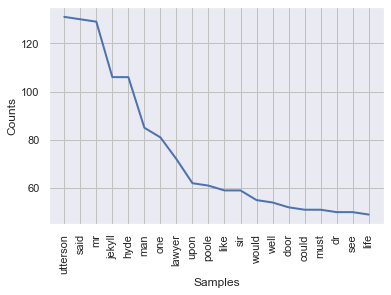

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [30]:
sns.set(color_codes=True)
freqDist = nltk.FreqDist(words2)
freqDist.plot(20)

In [31]:
# Создаем итоговую функцию 

In [34]:
def plot_words(url):
    req = requests.get(url)
    html = req.text
    soup = BeautifulSoup(html, "html5lib")
    text = soup.get_text()
    tokenizer = nltk.tokenize.RegexpTokenizer("\w+")
    tokens = tokenizer.tokenize(text)
    words = []
    for word in tokens:
        words.append(word.lower())
    sw = nltk.corpus.stopwords.words("english")
    words2 =[]
    for word in words:
        if word not in sw:
            words2.append(word)
    freqDist = nltk.FreqDist(words2)
    freqDist.plot(20)

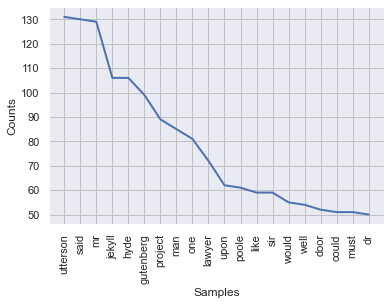

In [36]:
plot_words(url)

In [38]:
documents = [(list(nltk.corpus.movie_reviews.words(fileid)), category)
            for category in nltk.corpus.movie_reviews.categories()
            for fileid in nltk.corpus.movie_reviews.fileids(category)]

In [39]:
print(documents[0])

(['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', '.', 'one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.', 'what', "'", 's', 'the', 'deal', '?', 'watch', 'the', 'movie', 'and', '"', 'sorta', '"', 'find', 'out', '.', '.', '.', 'critique', ':', 'a', 'mind', '-', 'fuck', 'movie', 'for', 'the', 'teen', 'generation', 'that', 'touches', 'on', 'a', 'very', 'cool', 'idea', ',', 'but', 'presents', 'it', 'in', 'a', 'very', 'bad', 'package', '.', 'which', 'is', 'what', 'makes', 'this', 'review', 'an', 'even', 'harder', 'one', 'to', 'write', ',', 'since', 'i', 'generally', 'applaud', 'films', 'which', 'attempt', 'to', 'break', 'the', 'mold', ',', 'mess', 'with', 'your', 'head', 'and', 'such', '(', 'lost', 'highway', '&', 'memento', ')', ',', 'but', 'there', 'are', 'good', 'and', 'b

In [40]:
all_words =[]

In [41]:
for w in nltk.corpus.movie_reviews.words():
    all_words.append(w.lower())

In [44]:
all_words = nltk.FreqDist(all_words)

In [45]:
word_feats = list(all_words.keys())[:2500]

In [51]:
def find_feats(document):
    words = set(document)
    feats = {}
    for w in word_feats:
        feats[w] = (w in words)
    return feats

In [83]:
feat_set = [(find_feats(rev), category) for (rev, category) in documents]

In [85]:
type(feat_set)

list

In [86]:
len(feat_set)

2000

In [87]:
trainer = feat_set[:1500]

In [90]:
tester = feat_set[1500:]

In [92]:
classifier = nltk.NaiveBayesClassifier.train(trainer)

In [94]:
print("Accuracy of Classifier Percentage:",(nltk.classify.accuracy(classifier, tester))*100)

Accuracy of Classifier Percentage: 74.2


In [96]:
classifier.show_most_informative_features(20)

Most Informative Features
                  annual = True              pos : neg    =     11.3 : 1.0
                 frances = True              pos : neg    =     10.0 : 1.0
                   chick = True              neg : pos    =      7.2 : 1.0
                onscreen = True              neg : pos    =      7.2 : 1.0
              undercover = True              neg : pos    =      6.5 : 1.0
              schumacher = True              neg : pos    =      6.2 : 1.0
              uninspired = True              neg : pos    =      6.1 : 1.0
                   awful = True              neg : pos    =      6.1 : 1.0
                carriage = True              pos : neg    =      6.0 : 1.0
                 cunning = True              pos : neg    =      6.0 : 1.0
               mcdormand = True              pos : neg    =      6.0 : 1.0
                 singers = True              pos : neg    =      6.0 : 1.0
                smallest = True              pos : neg    =      6.0 : 1.0